In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from keras import layers
from keras.models import Sequential 
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import inception_resnet_v2
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import glob 
import cv2
import tqdm

#### Loading the data

Number of images : 25000


c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

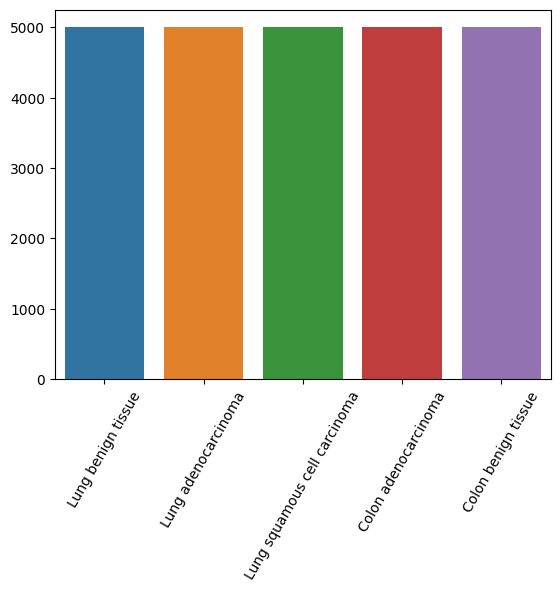

In [2]:
import pathlib

dataset = pathlib.Path("lung_colon_image_set/")
images = list(dataset.glob('*/*/*.jpeg'))

print(f"Number of images : {len(images)}")

lbt = dataset.glob('lung_image_sets/lung_n/*')
laca = dataset.glob('lung_image_sets/lung_aca/*')
lscc = dataset.glob('lung_image_sets/lung_scc/*')
cacc = dataset.glob('colon_image_sets/colon_aca/*')
cbt = dataset.glob('colon_image_sets/colon_n/*')

lung_benign_tissue = list(lbt)
lung_adenocarcinoma = list(laca)
lung_squamous_cell_carcinoma = list(lscc)
colon_adenocarcinoma = list(cacc)
colon_benign_tissue = list(cbt)

x = ['Lung benign tissue','Lung adenocarcinoma','Lung squamous cell carcinoma','Colon adenocarcinoma','Colon benign tissue']
y = [len(lung_benign_tissue),len(lung_adenocarcinoma),len(lung_squamous_cell_carcinoma),len(colon_adenocarcinoma),len(colon_benign_tissue)]
sns.barplot(x=x,y=y)
plt.xticks(rotation=60)
plt.show()

#### Plotting the images 

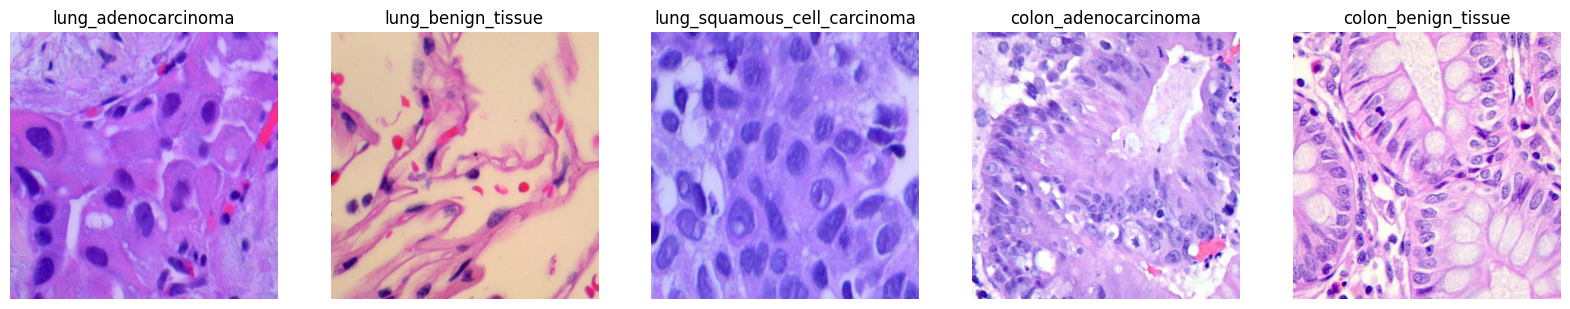

In [3]:
plt.figure(figsize=(20,20))

plt.subplot(1,5,1)
img1 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_aca/lungaca1.jpeg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  
plt.axis('off') 
plt.title('lung_adenocarcinoma')

plt.subplot(1,5,2)
img2 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_n/lungn1000.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('lung_benign_tissue')

plt.subplot(1,5,3)
img3 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_scc/lungscc1010.jpeg')
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('lung_squamous_cell_carcinoma')

plt.subplot(1,5,4)
img4 = cv2.imread('lung_colon_image_set/colon_image_sets/colon_aca/colonca1436.jpeg')
plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('colon_adenocarcinoma')

plt.subplot(1,5,5)
img2 = cv2.imread('lung_colon_image_set/colon_image_sets/colon_n/colonn1001.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('colon_benign_tissue')

plt.show()

#### Converting the images into numpy array

In [4]:
label_dict = {
    'lung_benign_tissue' : 0,
    'lung_adenocarcinoma' : 1,
    'lung_squamous_cell_carcinoma' : 2,
    'colon_adenocarcinoma' : 3,
    'colon_benign_tissue' : 4
}

image_dict = {
    'lung_benign_tissue' : lung_benign_tissue,
    'lung_adenocarcinoma' : lung_adenocarcinoma,
    'lung_squamous_cell_carcinoma' : lung_squamous_cell_carcinoma,
    'colon_adenocarcinoma' : colon_adenocarcinoma,
    'colon_benign_tissue' :colon_benign_tissue
}

In [5]:
x,y = [],[]

for name,images in image_dict.items():
    for img in images:
        i = cv2.imread(str(img))
        resized_image = cv2.resize(i,(229,229))
        x.append(resized_image)
        y.append(label_dict[name])

x = np.array(x)
y = np.array(y)

#### Train Test Split of the data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=10)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=100)

In [7]:
print("Number of training data : ",len(x_train))
print("Number of testing data : ",len(x_test))
print("Number of validation data : ",len(x_val))

Number of training data :  20000
Number of testing data :  2500
Number of validation data :  2500


In [8]:
# base_model = inception_resnet_v2.InceptionResNetV2(
#     weights='imagenet',  # Pre-trained weights on ImageNet
#     include_top=False,  # Exclude the classification layers
#     input_shape=(200, 200, 3)  # Adjust input shape to your data
# )


# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(1024, activation='relu')(x)
# output = Dense(5, activation='softmax')(x)  # Output layer with num_classes units


In [9]:
# model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [10]:
#  model.fit(
#     x_train,y_train,
#     validation_data=(x_val, y_val),
#     epochs=10,
#     batch_size=32
# )


In [11]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)

In [12]:
model = Sequential()
model.add(inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False,pooling='avg',input_shape=(229,229,3)))
model.add(Dense(5, activation='softmax'))
model.layers[0].trainable=False             
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 dense (Dense)               (None, 5)                 7685      
                                                                 
Total params: 54344421 (207.31 MB)
Trainable params: 7685 (30.02 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train_cat,epochs=2,batch_size=16)

Epoch 1/2
1250/1250 [==============================] - 1394s 1s/step - loss: 35.5589 - accuracy: 0.2672
Epoch 2/2
1250/1250 [==============================] - 1360s 1s/step - loss: 35.9617 - accuracy: 0.2835
